
## Recursion

#### Algorithm used (technique)

``Recursion Backtracking``


#### Explanation

Recursion backtracking is an algorithmic technique used to find all solutions to a problem by exploring all potential solutions incrementally. It involves calling the same function repeatedly with new parameters, diving deeper into the problem. Once a solution path fails (for example, when a queen cannot be placed in any column for a row in the n-Queens problem), the algorithm "backtracks" to the previous step and tries other possible options.


- **Recursion** allows the algorithm to move step-by-step through a problem, progressing deeper into potential solutions.

- **Backtracking** ensures that if a solution is not valid at any point, the algorithm will retract its steps and explore different possibilities from the previous level of recursion.

- **Base Case** - When all conditions for a solution are met (e.g., all queens are placed on the board without conflicts), the algorithm adds the solution to the list.

- **Termination Case** - If no valid solution is found after trying all possibilities, the algorithm ends that recursive path.


##### Real World Problem

``N-Queens Problem``

A classic backtracking example where the goal is to place ``n`` queens on a ``n x n`` chessboard such that no two queens threaten each other.
For each queen, the algorithm tries placing it in every column of a row, checking if the move is safe (i.e., the queen doesn't share the same column, diagonal, or anti-diagonal with other queens). If a queen can't be safely placed, the algorithm backtracks, moving the previous queens to different positions.


#### Solution

The backtracking recursion will go through the process of trying different configurations for the queens and will use backtracking when a conflict arises (when a queen can't be placed safely). Which continues until either a valid configuration is found or all possibilities are exhausted.

#### Comparison

| **Recursion**            |                          | **Iterative**              |                          |
| ------------------------ | ------------------------ | -------------------------- | ------------------------ |
| **Advantages**            | - Simple and easy to implement.                             | **Advantages**             | - Avoids recursion stack overflow.                          |
|                          | - Directly models the problem, making it intuitive.        |                           | - Can be more efficient for large problem sizes.             |
|                          | - Good for small to medium-sized problems.                  |                           | - More control over the stack.                                |
| **Limitations**           | - Can result in stack overflow for large problem sizes.    | **Limitations**            | - More complex to implement and reason about.                |
|                          | - Can be less memory efficient due to recursion overhead.  |                           | - Requires manual management of state (stack).               |
|                          | - Less efficient for very large inputs.                     |                           | - Less intuitive compared to recursion.                       |
| **Use Case**              | - Best for smaller problems or where recursion depth is manageable. | **Use Case**              | - Best for larger problems where stack overflow is a concern. |


In [ ]:
import time

# Check if there's a queen in the same column
def is_safe(board, row, col, n):
    # Loop thru each row
    for i in range(row):
        # If a queen is in the same column
        # board[i] represents as the column in the row being looped
        if (board[i] == col or 
            # If both are -1, then there is a queen (diagonally)
            board[i] - i == col - row or # Checks left-to-right
            # If both are the same value, then there is a queen
            board[i] + i == col + row): # Checks right-to-left
            return False
    # If it doesn't pass the conditions, then we can place the queen
    return True

def solve_n_queens(board, row, n, solutions):
    # If the row is now equal to the n (the size of board), we add the solution
    if row == n:
        # Save the current state of board so it won't be modified in backtracking
        solutions.append(board[:])
        return
    
    # Try placing queens in all columns for the current row
    for col in range(n):
        # For each column, we'll check if it's safe to place the queen
        if is_safe(board, row, col, n):
            board[row] = col  # Place the queen
            solve_n_queens(board, row + 1, n, solutions)  # Recur for the next row
            board[row] = -1  # Backtrack, remove the queen

def print_solution(board):
    # Loop thru each row, checking if we place the queen or not
    # Row in here represents the position of each queen in each row
    # Not technically the row in what'd you think in a 2d array
    # So it's a single-dimension array 
    for row in board:
        # Check each column in the board (the queens' positions)
        # If there is a queen print Q if not then print a dot
        # We use len(board) instead of explicitly passing n for adaptability
        # If there ever is a case that n wasn't passed around correctly
        # Or if the recursion modified the board
        line = ['Q' if col == row else '.' for col in range(len(board))]
        print(" ".join(line))
    print("-" * len(board) * 2)

# Initializer method
def n_queens(n):    
    solutions = [] # Initialize array of solutions
    board = [-1] * n  # Initialize the board with -1 (no queens placed)
    
    solve_n_queens(board, 0, n, solutions) # Base
    
    # After the many many recursions, we then (only) print all the valid solutions
    print(f"Found {len(solutions)} solutions for {n}-Queens:")
    for solution in solutions:
        print_solution(solution)

# The size of the board
n = 6

start_time = time.perf_counter()
n_queens(n)
end_time = time.perf_counter()

print(f"Completed in {end_time - start_time:.6f} seconds")

In [ ]:
import time

def is_safe(board, row, col, n):
    for i in range(row):
        if board[i] == col or \
            board[i] - i == col - row or \
            board[i] + i == col + row:
            return False
    return True

def solve_n_queens(n):
    # Stack to store (row, board_state) tuples
    stack = []
    solutions = []

    # Initialize the board with -1 (no queens placed)
    board = [-1] * n
    row = 0  # Start at the first row

    while row >= 0:
        # Try placing a queen in the current row
        safe = False
        for col in range(board[row] + 1, n):
            if is_safe(board, row, col, n):
                board[row] = col  # Place queen in column
                stack.append((row, board[:]))  # Save the current state
                safe = True
                break  # Move to the next row
        
        if not safe:
            if row == 0:  # No solution found, we're done
                break
            board[row] = -1  # Backtrack, remove the queen
            row -= 1  # Go back to the previous row
        else:
            row += 1  # Move to the next row
    
        # Check if we've reached the last row
        if row == n:
            solutions.append(board[:])  # Found a solution
            row -= 1  # Backtrack

    # Output all solutions
    print(f"Found {len(solutions)} solutions for {n}-Queens:")
    for solution in solutions:
        for row in solution:
            line = ['Q' if col == row else '.' for col in range(n)]
            print(" ".join(line))
        print()

    return solutions

n = 6

start_time = time.perf_counter()
solve_n_queens(n)
end_time = time.perf_counter()

print(f"Iterative backtracking completed in {end_time - start_time:.6f} seconds")

## Sorting

#### Algorithms used 

`Quick sort` & `Selection sort`

#### Explanation

 ``Selection Sort`` works by repeatedly selecting the minimum element from an unsorted portion of the list and swapping it with the element at the beginning of that portion. It continues this process until the entire list is sorted.

 ``Quick Sort`` is a divide-and-conquer technique. It works by selecting a pivot element from the list and partitioning the other elements into two sublists—those less than the pivot and those greater than the pivot. The algorithm then recursively sorts the sublists.


#### Real World Problems

This type of sorting might be used in applications like:

- ``File Management Systems`` for large collections of files by name, creation date, or file size.

- ``Financial Data`` for random financial numbers for analysis, such as transaction amounts.

- ``Event Scheduling`` for dates for planning events, appointments, or deadlines.


#### Time Complexity Comparison 
*May vary since this data was taken from a previous run*

| **Selection Sort**                | **Time Elapsed (Small Data)** | **Time Elapsed (Large Data)** | **Quick Sort**                | **Time Elapsed (Small Data)** | **Time Elapsed (Large Data)** |
| --------------------------------- | ----------------------------- | ----------------------------- | ----------------------------- | ----------------------------- | ----------------------------- |
| **Files**                         | 0.000013 seconds              | 0.020218 seconds              | **Files**                     | 0.000016 seconds              | 0.001171 seconds              |
| **Numbers**                       | 0.000009 seconds              | 0.016659 seconds              | **Numbers**                   | 0.000011 seconds              | 0.001046 seconds              |
| **Dates**                         | 0.000006 seconds              | 0.020236 seconds              | **Dates**                     | 0.000008 seconds              | 0.001185 seconds              |




#### Key Takeaways

- ``Quick Sort`` outperforms ``Selection Sort`` as the data size grows, both for small and large datasets.

- For small data, both algorithms show negligible time differences, but ``Quick Sort`` is faster.

- As the data size increases, ``Quick Sort`` remains significantly faster, especially when dealing with large datasets.



In [ ]:
import random
import time
from datetime import datetime, timedelta

# Generate mock filenames without worrying about their file sizes
# This speeds up lookups as we don't need to fetch or wait for the actual file data
def generate_filenames(n):
    return [f"file_{i}.txt" for i in range(1, n+1)]

# Generate a list of random numbers
# The number of random numbers is determined by the n parameter
# While the start and end parameters define the range (default: 1 to 1000)
# The n value varies based on the provided configuration
def generate_random_numbers(n, start=1, end=1000):
    return [random.randint(start, end) for _ in range(n)]

# Generate a list of random dates
def generate_random_dates(n):
    # Base date (January 1, 2020)
    start_date = datetime(2020, 1, 1)
    
    # From the base, we add a random generated day
    # For example, if the random is 5 then we add 5 days to the base date
    # So in here we randomized from 0 to 1000 days to add
    # Don't forget that this is an array, so we loop until we reach the n parameter
    return [start_date + timedelta(days=random.randint(0, 1000)) for _ in range(n)]

def selection_sort(arr):
    n = len(arr) # Get the size of array
    
    for i in range(n): 
        # At the start we initialize the minimum index which at first would be the first index
        # Then as it loops, it will be modified to the least of the least index in the array
        min_idx = i
        
        # j in here represents the next index of i
        # The loop's start is incremented by 1
        # Basically decreasing the elements of the array in each loop
        # For example, we were given a n of 5
        # That would be like, 1-2-3-4-5
        # Doesn't sound like much but it means that in every loop
        # we start at the next index so in result the elements decreases
        for j in range(i+1, n):
            # At the base we check if the j here in this current loop is less than the minimum index
            # But as the loop goes on the minimum index also changes (if the condition was met)
            if arr[j] < arr[min_idx]:
                # If the condition was met then modify the minimum index
                # The j in here will now be the new minimum index
                min_idx = j
        # After the second loop, in this first loop we then swap
        # Swapping here takes the initial index then the winner of the second loop (the min index)
        # To where the initial index was before
        # Thus we call it "selection" sort, cuz we select what we need to swap
        arr[i], arr[min_idx] = arr[min_idx], arr[i]
    return arr

def quick_sort(arr):
    # If the array has one or zero elements, it's already sorted, so return it as is
    if len(arr) <= 1:
        return arr
      
    # Our reference to compare the right and left side of the array
    # Essentially it is the element that is in the middle of the (current) array
    pivot = arr[len(arr) // 2]
    
    # Left side of the array (or the lesser elements of the current pivot)
    # We add the elements that meet the condition (if the element is less than the reference)
    left = [x for x in arr if x < pivot]
    
    # We just get the middle element from here
    middle = [x for x in arr if x == pivot]
    
    # Right side of the array (or the greater elements of the current pivot)
    # Same logic for the left side of the array but now 
    # the condition is if the element is greater than reference
    right = [x for x in arr if x > pivot]
    
    # Recursively do method to the left and right sub-arrays,
    # and concatenate the results: left + middle + right
    return quick_sort(left) + middle + quick_sort(right)

small_dataset_size = 10
large_dataset_size = 1000

small_files = generate_filenames(small_dataset_size)
large_files = generate_filenames(large_dataset_size)

small_numbers = generate_random_numbers(small_dataset_size)
large_numbers = generate_random_numbers(large_dataset_size)

small_dates = generate_random_dates(small_dataset_size)
large_dates = generate_random_dates(large_dataset_size)


# Data to process
print("Processing mock files..\n")

# Size of data to process
print("Small data:")

# For selection sort
start_time = time.perf_counter()
sorted_small_files_selection = selection_sort(small_files.copy())
end_time = time.perf_counter()
print(f"Selection Sort - Small Files: Time elapsed: {end_time - start_time:.6f} seconds")

# For quick sort
start_time = time.perf_counter()
sorted_small_files_quick = quick_sort(small_files.copy())
end_time = time.perf_counter()
print(f"Quick Sort - Small Files: Time elapsed: {end_time - start_time:.6f} seconds")
print()

# Size of data to process
print("Large data:")

# For selection sort
start_time = time.perf_counter()
sorted_large_files_selection = selection_sort(large_files.copy())
end_time = time.perf_counter()
print(f"Selection Sort - Large Files: Time elapsed: {end_time - start_time:.6f} seconds")

# For quick sort
start_time = time.perf_counter()
sorted_large_files_quick = quick_sort(large_files.copy())
end_time = time.perf_counter()
print(f"Quick Sort - Large Files: Time elapsed: {end_time - start_time:.6f} seconds")
print()

# Data to process
print("Processing random numbers..\n")

# Size of data to process
print("Small data:")

# For selection sort
start_time = time.perf_counter()
sorted_small_numbers_selection = selection_sort(small_numbers.copy())
end_time = time.perf_counter()
print(f"Selection Sort - Small Numbers: Time elapsed: {end_time - start_time:.6f} seconds")

# For quick sort
start_time = time.perf_counter()
sorted_small_numbers_quick = quick_sort(small_numbers.copy())
end_time = time.perf_counter()
print(f"Quick Sort - Small Numbers: Time elapsed: {end_time - start_time:.6f} seconds")
print()

# Size of data to process
print("Large data:")

# For selection sort
start_time = time.perf_counter()
sorted_large_numbers_selection = selection_sort(large_numbers.copy())
end_time = time.perf_counter()
print(f"Selection Sort - Large Numbers: Time elapsed: {end_time - start_time:.6f} seconds")

# For quick sort
start_time = time.perf_counter()
sorted_large_numbers_quick = quick_sort(large_numbers.copy())
end_time = time.perf_counter()
print(f"Quick Sort - Large Numbers: Time elapsed: {end_time - start_time:.6f} seconds")
print()

# Data to process
print("Processing random dates..\n")

# Size of data to process
print("Small data:")

# For selection sort
start_time = time.perf_counter()
sorted_small_dates_selection = selection_sort(small_dates.copy())
end_time = time.perf_counter()
print(f"Selection Sort - Small Dates: Time elapsed: {end_time - start_time:.6f} seconds")

# For quick sort
start_time = time.perf_counter()
sorted_small_dates_quick = quick_sort(small_dates.copy())
end_time = time.perf_counter()
print(f"Quick Sort - Small Dates: Time elapsed: {end_time - start_time:.6f} seconds")
print()

# Size of data to process
print("Large data:")

# For selection
start_time = time.perf_counter()
sorted_large_dates_selection = selection_sort(large_dates.copy())
end_time = time.perf_counter()
print(f"Selection Sort - Large Dates: Time elapsed: {end_time - start_time:.6f} seconds")

# For quick sort
start_time = time.perf_counter()
sorted_large_dates_quick = quick_sort(large_dates.copy())
end_time = time.perf_counter()
print(f"Quick Sort - Large Dates: Time elapsed: {end_time - start_time:.6f} seconds")


## Search

#### Algorithms Used

`Binary Search` & `Interpolation Search`

#### Explanation

Both Binary Search and Interpolation Search are efficient searching algorithms used to find a specific element in a sorted dataset. The two differ in how they navigate through the data:

``Binary Search``

- **Divide and conquer** strategy.

- Works by repeatedly dividing the search space in half.

- The algorithm compares the target with the middle element and narrows down the search space to either the left or right half.


``Interpolation Search``

- **Estimate the position** of the target based on the value.

- It assumes that the values are uniformly distributed, estimating the target’s position based on a linear interpolation between the low and high bounds.

- If the estimate points to an element that isn’t the target, the search space is adjusted accordingly.

Both algorithms are designed for sorted datasets but have different use cases based on the distribution of the data.

##### Real World Problem

 - **Binary Search** (Stock Price Lookup)
    - Imagine you are trying to find the stock price on a specific date from a list of sorted dates and prices. This algorithm is ideal here because the data is already sorted (by date), and you can efficiently find the price for any given date by halving the search space with each comparison.

 - **Interpolation Search** (Predicting the Value)
    - For predicting values (such as sales for a given year), this algorithm is useful when the data is uniformly distributed. The algorithm estimates the target’s position based on the values surrounding it, offering a more efficient search for large datasets where the values are evenly spaced.

#### Solution

- **Binary Search** narrows down the search to the date of interest. This allows for efficient retrieval of the stock price on that date.

- **Interpolation Search** estimates the position of the target year based on the years provided. If the data points (e.g., sales over multiple years) are evenly distributed, this search method will be faster than Binary Search in terms of comparisons.


In [ ]:
import time

# Our sample data, should be sorted though
dates = ['2023-01-01', '2023-02-01', '2023-03-01', '2023-04-01', '2023-05-01']
prices = [150, 170, 160, 180, 175]

def binary_search(dates, target_date):
    # Initialize the low (left) as 0
    # Initialize the high (right) as the last index
    # len(dates) doesn't start at 0 that's why we have to subtract it by 1
    low, high = 0, len(dates) - 1
    
    # Keep this process on until the low isn't less or equal to high
    while low <= high:
        # Initialize the middle index
        # This divides and gets the remainder of the result
        mid = (low + high) // 2
        
        # Check if it is what we're looking for
        if dates[mid] == target_date:
            return mid  # Return the index where the date is found

        # If not, check if it is less than the target
        elif dates[mid] < target_date:
            # We then add the middle index by 1
            # It just searches/moves to the right half of the array
            low = mid + 1
        # If the middle index is not less than the target
        else:
            # So now we search/move to the left half of the array
            high = mid - 1
    return -1  # Return -1 if the date is not found

target_date = '2023-03-01'

start_time = time.perf_counter()
index = binary_search(dates, target_date)
end_time = time.perf_counter()

if index != -1:
    print(f"The stock price on {target_date} was {prices[index]}")
else:
    print(f"Stock price for {target_date} not found")
    
print(f"Completed in {end_time - start_time:.6f} seconds")


In [ ]:
# Our sample data, should be sorted though also
years = [2000, 2005, 2010, 2012, 2015, 2020]
sales = [100, 150, 200, 250, 300, 400]

def interpolation_search(years, target_year):
    # Same initialization for the Binary Search
    low, high = 0, len(years) - 1
    
    # A pretty complex set of condition here
    # We continue if the low is less than or equal to high
    # And we also check if the target is greater or equal to the low value of the array
    # Then vice versa for the last condition
    while low <= high and target_year >= years[low] and target_year <= years[high]:
        # We calculate the position from here on using the interpolation formula
        # This estimates where the target year might be, based on the values at low and high
        pos = low + ((target_year - years[low]) * (high - low)) // (years[high] - years[low])

        # Check if the target year is found at the calculated position pos
        if years[pos] == target_year:
            return pos  # Return the index if the year is found

        # If the target year is greater than the value at pos, move the low boundary up (right)
        elif years[pos] < target_year:
            low = pos + 1
        # If the target year is smaller than the value at pos, move the high boundary down (left)
        else:
            high = pos - 1

        # Return -1 if the year is not found in the list
        return -1

target_year = 2012

start_time = time.perf_counter()
index = interpolation_search(years, target_year)
end_time = time.perf_counter()

if index != -1:
    print(f"Sales in {target_year} were predicted to be {sales[index]}")
else:
    print(f"Sales data for {target_year} not found")
    
print(f"Completed in {end_time - start_time:.6f} seconds")

## Dynamic Programming

#### Explanation

``Dynamic Programming (DP)`` is an optimization technique used to solve problems by breaking them down into smaller subproblems and storing the results of these subproblems to avoid redundant calculations. It is particularly useful when a problem can be divided into overlapping subproblems.

- **Memoization**: DP uses a bottom-up approach where we store results of subproblems in a table (or array) to avoid recalculating them repeatedly.

- **Optimal Substructure**: The solution to a problem depends on solutions to smaller subproblems, which is the key property of DP.

- **Overlapping Subproblems**: The problem can be broken down into subproblems which are solved multiple times, and these subproblems can be solved independently.

##### Real World Problems

 ``Fibonacci Problem`` involves calculating the nth Fibonacci number where each number is the sum of the two preceding ones. DP helps to store previous Fibonacci numbers to avoid recalculating them repeatedly.

 ``Knapsack Problem`` is a classical optimization problem where you have a set of items, each with a weight and a value, and a knapsack with a weight limit. The goal is to maximize the total value of the items without exceeding the capacity of the knapsack.

#### Comparison

| **Dynamic Programming**           |                              | **Recursion**               |                              |
|-----------------------------------|------------------------------|-----------------------------|------------------------------|
| **Advantages**                    | - More efficient for large inputs due to memoization. | **Advantages**              | - Simple and easy to implement.                             |
|                                   | - Avoids redundant calculations, saving time. |                             | - Directly models the problem, making it intuitive.        |
|                                   | - Suitable for problems with overlapping subproblems. |                             | - Good for small to medium-sized problems.                  |
| **Limitations**                   | - May use a lot of memory to store intermediate results. | **Limitations**             | - Can result in stack overflow for large problem sizes.    |
|                                   | - Requires more time to set up compared to recursive solutions. |                             | - Can be less memory efficient due to recursion overhead.  |
|                                   | - Requires more complex logic for table management. |                             | - Less efficient for very large inputs.                     |
| **Use Case**                      | - Best for problems with overlapping subproblems or when optimization is required. | **Use Case**               | - Best for smaller problems or when recursion depth is manageable. |
| **Execution Time (for n=10)**     | 0.000015 seconds (may vary)             | **Execution Time**          | 0.000925 seconds (may vary)             |

#### Key Takeaways

- ``Dynamic Programming`` is more efficient for larger inputs due to memoization, which helps avoid redundant calculations. It’s particularly beneficial for problems that have overlapping subproblems, as it saves time by storing intermediate results.

  - can be memory-intensive, as it requires storage for intermediate results, and setting up the solution can be more complex. However, it’s the preferred approach when optimization is needed for problems with repeated subproblems.

- ``Recursion``, while intuitive and simple to implement, is better suited for smaller problems or when the recursion depth is manageable. It can be less efficient for large inputs and may suffer from stack overflow issues.
  
  - ideal for problems that naturally fit into a recursive model and when dealing with small to medium-sized inputs. However, for very large inputs, its efficiency and memory usage can become a concern due to the overhead of recursion calls.


In [ ]:
import time

def fibonacci_dp(n):
    # Base conditions
    if n == 0:
        return 0
    if n == 1:
        return 1

    # Initialize an array of zeroes with the length of the n and add 1
    # Why add 1? Because we need to reference the first index
    dp = [0] * (n + 1)
    
    # Set the first and second index as 0,1 (fixed for fibo)
    dp[0], dp[1] = 0, 1
    
    # Start at index 3, since we've come across the indices 1 and 2
    # We complement the stop by adding 1 since earlier we added 1 for the initial array
    for i in range(2, n + 1):
        # For the current index in the loop
        # We calculate the previous index value and the previous previous index of the value
        # Like one step back then two steps back
        # So like you know just add it
        dp[i] = dp[i - 1] + dp[i - 2]
    
    # After the loop, we return the result
    return dp[n]

start_time = time.perf_counter()
print("Fibonacci DP Result:", fibonacci_dp(10))
end_time = time.perf_counter()
print(f"Fibonacci DP Execution Time: {end_time - start_time:0.6f} seconds")

def fibonacci_recursive(n):
    # Base conditions
    if n == 0:
        return 0
    if n == 1:
        return 1
    
    # For any other value of n, calculate the Fibonacci number by calling the function recursively
    # This calls this method for (n-1) and (n-2), summing their results
    return fibonacci_recursive(n - 1) + fibonacci_recursive(n - 2)

start_time = time.perf_counter()
print("\nFibonacci Recursive Result:", fibonacci_recursive(10))
end_time = time.perf_counter()
print(f"Fibonacci Recursive Execution Time: {end_time - start_time:0.6f} seconds")


In [ ]:
import time

def knapsack_dp(weights, values, capacity):
    # Get the number of items (length of weights array)
    n = len(weights)
    
    # Create a 2D array to store the max value for each item and capacity combo
    # Rows = items (0 to n), Columns = capacities (0 to capacity)
    # Add 1 to both dimensions to account for the "0-item" and "0-capacity" cases
    dp = [[0] * (capacity + 1) for _ in range(n + 1)]
    print(dp)
    print()
    # Start looping through the items (row by row)
    # Though we start at row 1, because row 0 is our reference
    for i in range(1, n + 1):
        # Now loop through all possible capacities (column by column)
        # Stop at capacity that is added by 1 to account for the zero base initialization
        for w in range(capacity + 1):
            # Check if the current item's weight can fit in the current capacity
            # At the base, since i is index 1 then this turns into index 0
            # It lags behind by 1 each loop 
            # W here represents the current column of our dp so at the first it would reference row 0
            
            if weights[i - 1] <= w:
                # If the condition is met, we calculate the max value
                # So we've got two options
                # Option 1
                # Don't include the current item (value from the row above)
                # Option 2 
                # Include the current item
                # Subtract its weight from the current capacity (so we can get the index above)
                # Add its value to the result of that remaining capacity (row above)
                dp[i][w] = max(dp[i - 1][w], dp[i - 1][w - weights[i - 1]] + values[i - 1])
                
            else:
                # If it doesn't fit the current capacity, just copy over the value from the row above
                dp[i][w] = dp[i - 1][w]

    # This represents the max value we can get for the given capacity and all items
    # This is the last row's last column value
    return dp[n][capacity]


weights = [1, 3, 4]
values = [10, 40, 50]
capacity = 6

start_time = time.perf_counter()
print("\nKnapsack DP Result:", knapsack_dp(weights, values, capacity))  
end_time = time.perf_counter()

print(f"Knapsack DP Execution Time: {end_time - start_time:0.6f} seconds")

# Greedy

### Explanation

The ``Greedy Algorithm`` for the Knapsack problem works by making the best choice at each step based on a specific criterion, which is typically the **value-to-weight ratio** of the items. The items are first sorted by their value-to-weight ratio in descending order, and then they are added to the knapsack until the capacity is reached. If an item cannot be completely added (due to capacity limitations), it is included fractionally.


``Strengths``

- **Efficiency**: Greedy algorithms are generally fast, with a time complexity of \(O(n \log n)\) due to the sorting step.

- **Simplicity**: The greedy approach is easy to understand and implement, requiring fewer computational steps compared to other methods.

- **Low Space Complexity**: Greedy algorithms typically require \(O(n)\) space, as they only need to store the items and their corresponding ratios.

``Limitations``

- **Suboptimal Solution**: Greedy algorithms may not always provide the optimal solution. Since the algorithm makes decisions based on local optimization (best immediate choice), it may fail to find the best global solution.

- **Limited Applicability**: This approach works well only for problems with the **greedy-choice property** and **optimal substructure**, which may not be present in all optimization problems.

- **No Backtracking**: Once a decision is made, the algorithm doesn't reconsider it. This can result in missing out on better choices that may have emerged later.


#### Divide-and-Conquer Approach

The ``Divide-and-Conquer`` approach for the Knapsack problem involves breaking the problem down into smaller subproblems. Specifically, the problem is divided by recursively deciding whether to include an item or exclude it, while tracking the best total value for each combination of included/excluded items. The decision process follows these steps:

1. If the current item can fit in the knapsack (i.e., its weight is less than or equal to the remaining capacity), both the inclusion and exclusion of the item are considered.

2. The process is repeated for smaller subproblems, until all items are either considered or excluded.

This method guarantees an optimal solution, but it has an exponential time complexity of \(O(2^n)\), making it inefficient for large problem sizes. It is primarily used when the problem is small enough or when a recursive approach is desired.


#### Comparison of Solutions

| Algorithm               | Time Complexity   | Space Complexity | Optimal Solution? | When to Use                                       |
|-------------------------|-------------------|------------------|------------------|--------------------------------------------------|
| **Greedy Knapsack**      | \(O(n \log n)\)   | \(O(n)\)         | No               | Suitable when an approximate solution is acceptable, or when greedy-choice property holds. |
| **Dynamic Programming**  | \(O(n \times W)\) | \(O(n \times W)\) | Yes              | Best when an exact solution is needed, and the problem size is manageable. |
| **Divide and Conquer**   | \(O(2^n)\)        | \(O(n)\)         | Yes              | Useful for small problems or when a recursive approach is preferred. |


#### Performance Comparison

| Algorithm               | Time Complexity   | Space Complexity | Optimal Solution | When to Use                                       |
|-------------------------|-------------------|------------------|------------------|--------------------------------------------------|
| **Greedy**              | \(O(n \log n)\)   | \(O(n)\)         | No               | When an approximate solution is acceptable. |
| **Dynamic Programming** | \(O(n \times W)\) | \(O(n \times W)\) | Yes              | When an exact solution is needed for a given capacity. |
| **Divide-and-Conquer**  | \(O(2^n)\)        | \(O(n)\)         | Yes              | Suitable for small problems or when a recursive approach is desired. |




In [4]:
import time

def greedy_knapsack(weights, values, capacity):
    # Get the number of items (length of weights array)
    n = len(weights)
    
    # So we have here an array that has the length of our weights
    # For each element in this array, we have a sub-array consisting of
    # For the first column, we go get the values value of the current loop
    # For the second column, we get the weight value of the current loop
    # Then for the last column, we get the value-to-weight ratio for the current loop
    # For the lambda config, we reverse sort (descending) it by referencing index 2 
    items = sorted([(values[i], weights[i], values[i] / weights[i]) for i in range(n)], 
    key=lambda x: x[2], reverse=True)
    
    # Initialize the total value to sum up the values later
    total_value = 0
    
    # Loop thru the items
    for value, weight, ratio in items:
        # Check if the remaining capacity can fully accommodate the current item's weight
        # As the loop progresses, the value of capacity and weight is modified
        # Kind of cherry picking through the items
        
        if capacity >= weight:
            # If it is then we subtract capacity from weight
            # This simulates "taking" the item and reducing the available space
            capacity -= weight
            
            # Then add the total value from the value
            total_value += value
        else:  
            # If the capacity is less than the weight
            # We need to account for the available space
            # Doing the same but also multiply it with the ratio of capacity and weight
            # This means we're only taking a fraction of the item
            
            total_value += value * (capacity / weight)
            break
        
    
    return total_value

values = [10, 40, 50, 70]
weights = [1, 3, 4, 5]
capacity = 6

start_time = time.perf_counter()
print("Greedy Knapsack: ", greedy_knapsack(weights, values, capacity)) 
end_time = time.perf_counter()
time_elapsed = end_time - start_time

print(f"Completed in {time_elapsed:.6f} seconds")



Greedy Knapsack:  83.33333333333333
Completed in 0.000608 seconds


In [5]:
import time

def knapsack_divide_and_conquer(weights, values, capacity, n):
    # Base case
    # If no items are left or the knapsack capacity is 0,
    # the total value is 0 (no further items can be added)
    if n == 0 or capacity == 0:
        return 0

    # If the current item's weight does not fit the remaining capacity,
    # skip this item and move to the next one (reduce the problem size by 1 item)
    if weights[n - 1] > capacity:
        return knapsack_divide_and_conquer(weights, values, capacity, n - 1)

    # Option 1
    # Include the current item in the knapsack
    # Add the value of the current item (values[n-1]) to the result of 
    # a recur with reduced capacity (capacity - weights[n-1]) and
    # the remaining items (n-1)
    include = values[n - 1] + knapsack_divide_and_conquer(weights, values, capacity - weights[n - 1], n - 1)

    # Option 2
    # Exclude the current item from the knapsack
    # Recur the same item for the same capacity but now with one less item (n-1)
    exclude = knapsack_divide_and_conquer(weights, values, capacity, n - 1)

    # Pick between the two options for the maximum value
    return max(include, exclude)


weights = [1, 3, 4, 5]
values = [10, 40, 50, 70]
capacity = 8
n = len(weights)

start_time = time.perf_counter()
print("Divide-and-Conquer Knapsack Result:", knapsack_divide_and_conquer(weights, values, capacity, n))
end_time = time.perf_counter()

time_elapsed = end_time - start_time
print(f"Completed in {time_elapsed:.6f} seconds")

Divide-and-Conquer Knapsack Result: 110
Completed in 0.000328 seconds


# Graph Algorithms

#### Explanation

#### ``Dijkstra’s Algorithm``

is a well-known graph algorithm used to find the shortest path from a starting node to all other nodes in a weighted graph. The algorithm works by maintaining a set of nodes whose shortest distance from the source is known. It iteratively selects the node with the smallest tentative distance and updates its neighbors' distances. This process continues until the shortest paths to all nodes are found.

  ##### Use Cases
   - **Routing**: Dijkstra’s algorithm is commonly used in networking for routing protocols such as OSPF (Open Shortest Path First) and IS-IS (Intermediate System to Intermediate System).

   - **GPS Navigation**: It is used in navigation systems to find the shortest path between locations.

   - **Network Flow**: Used in problems involving shortest paths in communication networks or traffic systems.

#### ``Breadth-First Search (BFS)`` 

is a graph traversal algorithm that explores all the nodes of a graph level by level, starting from a given source node. It uses a queue to store the nodes to be explored next, ensuring that the nearest unvisited node is processed first. BFS is particularly useful for unweighted graphs to find the shortest path from a source node to any other node.

  ##### Use Cases
   - **Finding the Shortest Path in Unweighted Graphs**: BFS is the go-to algorithm for finding the shortest path in a graph where all edges have the same weight.

   - **Social Networks**: BFS is used to explore relationships between people, such as finding the shortest connection path between two users.

   - **Web Crawling**: BFS can be used for web crawlers to explore all pages connected to a given page.


#### Visualizing the Graph

Both Dijkstra’s Algorithm and BFS can be visualized step-by-step to demonstrate the traversal or pathfinding process. These visualizations help in understanding how the algorithms work in real-time:

- As ``Dijkstra’s Algorithm`` runs, the shortest path from the start node is gradually revealed, with edges marked in a specific color to show the path.

- ``BFS`` traverses through the order of the nodes is visualized, showing the nodes being explored in layers.


#### Summary

- Dijkstra’s Algorithm is ideal for finding the shortest paths in weighted graphs.

- BFS is a simple and efficient graph traversal algorithm that works well for unweighted graphs and finding the shortest path in them.
- Both algorithms can be visualized to provide a clear understanding of their step-by-step operation.



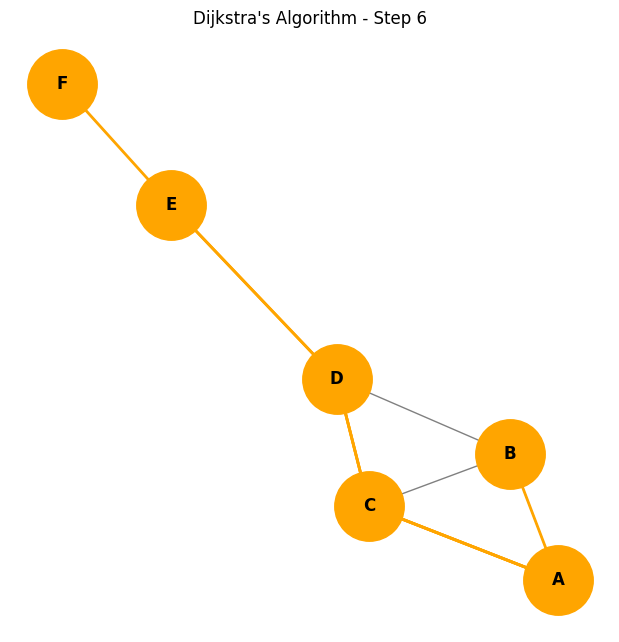

In [8]:
import matplotlib.pyplot as plt
import networkx as nx
import heapq
from IPython.display import clear_output
import time

# Define Dijkstra's algorithm
def dijkstra(graph, start):
    distances = {node: float('inf') for node in graph}
    distances[start] = 0
    priority_queue = [(0, start)]  # (distance, node)
    
    # For visualization: Store node updates
    path_updates = {start: [start]}
    
    while priority_queue:
        current_distance, current_node = heapq.heappop(priority_queue)

        if current_distance > distances[current_node]:
            continue

        for neighbor, weight in graph[current_node].items():
            distance = current_distance + weight
            if distance < distances[neighbor]:
                distances[neighbor] = distance
                heapq.heappush(priority_queue, (distance, neighbor))

                # Track the path to each node for visualization
                path_updates[neighbor] = path_updates.get(current_node, []) + [neighbor]
    
    return distances, path_updates

# Define the graph as an adjacency list with weights
graph = {
    'A': {'B': 7, 'C': 9},
    'B': {'A': 7, 'C': 10, 'D': 15},
    'C': {'A': 9, 'B': 10, 'D': 11},
    'D': {'B': 15, 'C': 11, 'E': 6},
    'E': {'D': 6, 'F': 9},
    'F': {'E': 9}
}

# Run Dijkstra's algorithm
start_node = 'A'
distances, path_updates = dijkstra(graph, start_node)

# Create a NetworkX graph for visualization
G = nx.Graph()
for node, neighbors in graph.items():
    for neighbor, weight in neighbors.items():
        G.add_edge(node, neighbor, weight=weight)

# Visualization: Draw the initial graph
pos = nx.spring_layout(G, seed=42)  # positions for all nodes

# Jupyter-specific: Set inline mode
%matplotlib inline

# Draw the graph step-by-step
def update_graph(step, delay=1):
    clear_output(wait=True)  # Clear previous output for smoother animations
    plt.figure(figsize=(6, 6))
    nx.draw(G, pos, with_labels=True, node_size=2000, node_color='skyblue', font_size=12, font_weight='bold', edge_color='gray')

    # Highlight the nodes and edges for the current step
    for node in path_updates:
        if len(path_updates[node]) <= step:
            nx.draw_networkx_nodes(G, pos, nodelist=[node], node_color='orange', node_size=2500)
    
    # Highlight the edges along the path
    for node in path_updates:
        for i in range(1, len(path_updates[node])):
            nx.draw_networkx_edges(G, pos, edgelist=[(path_updates[node][i-1], path_updates[node][i])], edge_color='orange', width=2)

    plt.title(f"Dijkstra's Algorithm - Step {step + 1}")
    plt.show()
    time.sleep(delay)  # Add delay for better visualization

# Visualize each step with a delay
for step in range(len(path_updates)):
    update_graph(step, delay=1)  # Adjust delay time as needed


In [ ]:
from collections import deque

def bfs(graph, start):
    visited = set()
    queue = deque([start])
    traversal_order = []

    while queue:
        node = queue.popleft()
        if node not in visited:
            visited.add(node)
            traversal_order.append(node)
            for neighbor in graph[node]:
                if neighbor not in visited:
                    queue.append(neighbor)

    return traversal_order


graph = {
    'A': ['B', 'C'],
    'B': ['A', 'D', 'E'],
    'C': ['A', 'F'],
    'D': ['B'],
    'E': ['B', 'F'],
    'F': ['C', 'E']
}


print(bfs(graph, 'A'))  